In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [111]:
x=pd.read_csv('./Training Data/Logistic_X_Train.csv')
x=x.values
y=pd.read_csv('./Training Data/Logistic_Y_Train.csv')
y=y.values.reshape(-1)


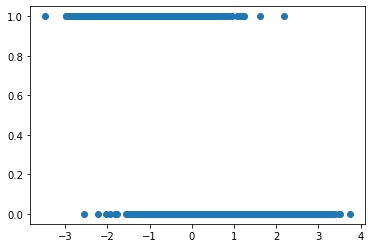

In [112]:
xt=x[:,0]
plt.scatter(xt,y)
plt.show()

In [113]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)


In [114]:
def sigmoid(hx):
    return (1.0/(1.0+(np.exp(-1*hx))))

In [115]:

def error(x,y,w,b):
    er=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        er+=(y[i])*(np.log2(hx))+(1-y[i])*(np.log2(1-hx))
        er=er/m
    return er

In [116]:
def grad(x,y,w,b):
    grad_b=0
    grad_w=np.zeros(x.shape[1])
    
    m=x.shape[0]
    
    for i in range(m):
        
        hx=hypothesis(x[i],w,b)
        grad_b+=(y[i]-hx)
        grad_w+=(y[i]-hx)*x[i]           # broadcasting
    return grad_w/m , grad_b/m

In [117]:
def grad_ascent(x,y,ler_rate=.01):
    
    w = 2*np.random.random(x.shape[1])
    b = 5*np.random.random()
    err=[]
    for i in range(500):
        
        
        g_w , g_b =grad(x,y,w,b)
        err.append(error(x,y,w,b))
        w = w + ler_rate*g_w
        b = b + ler_rate*g_b
    return w , b , err

In [118]:
w , b ,err=grad_ascent(x,y)


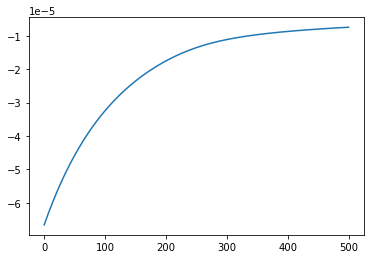

In [119]:
plt.plot(err)
plt.show()

In [120]:
def prediction(x,w,b):
    hx=hypothesis(x,w,b)
    if hx>0.5:
        return 1
    return 0

In [133]:
x_test=pd.read_csv('./Testing Data/Logistic_X_Test.csv')
x_test=x_test.values
xt1=[]
xt0=[]
pred=[]
for test in x_test:
    p=(prediction(test,w,b))
    if p==1:
        xt1.append(test)
    else:
        xt0.append(test)
xt0=np.array(xt0)
xt1=np.array(xt1)

In [137]:
# scattering the training data


In [123]:
x1=[]
x0=[]
for i in range(y.shape[0]):
    
    if y[i]==0:
        x0.append(x[i])
    else:
        x1.append(x[i])

    

In [129]:
x1=np.array(x1)
x0=np.array(x0)


In [147]:
from mpl_toolkits import mplot3d

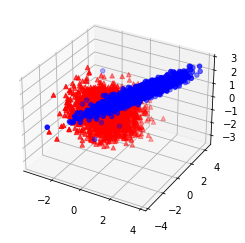

In [150]:
p=plt.axes(projection='3d')
p.scatter3D(x1[:,0],x1[:,1],x1[:,2],color='r',marker='^')
p.scatter3D(x0[:,0],x0[:,1],x0[:,2],color='b')
p.scatter3D(xt1[:,0],xt1[:,1],xt1[:,2],color='r',marker='^')
p.scatter3D(xt0[:,0],xt0[:,1],xt0[:,2],color='b')
